In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


# <p style="background-color:#253D5B; font-family:newtimeroman;color:#FFF9ED;font-size:100%; text-align:center; border-radius: 15px 55px;">🛍️ Data Collection 🛒</p>



> <b> <i><p> The Customer Shopping Preferences Dataset provides important information about how people shop and what they like to buy. This data is crucial for businesses to make smart decisions about what products to offer, how to market them, and how to make customers happy. The dataset includes details about customers, like how old they are, their gender, what they usually buy, how they like to pay, and how often they shop. By looking at this data, businesses can understand their customers better and use that knowledge to improve their products and services. In short, this dataset is a valuable tool for businesses that want to make choices that match what their customers want.</p></i> </b> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color=['#8693AB','#BDD4E7','#637074','#AAB9CF','#67697C','#253D5B']

In [3]:

df=pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually



# <p style="background-color:#253D5B; font-family:newtimeroman;color:#FFF9ED;font-size:100%; text-align:center; border-radius: 15px 55px;">🛍️ Data Understanding 🛒</p>

 <b> <i><p>Data understanding is a crucial step in the data analysis process. It involves gaining a comprehensive knowledge of the data you are working with, including its structure, content, and potential challenges.</p></i></b>


<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"><p>
    <p style="font-weight: bold; color: white;">     
 <i>                      This dataset provides a comprehensive overview of customer shopping preferences, offering valuable insights for businesses aiming to deepen their understanding of their clientele.This dataset encompasses a diverse set of 18 features,including customer age, gender, purchase behavior, favored payment methods, shopping frequency, and feedback ratings. Moreover, the dataset delves into the specifics of purchased items, preferred shopping seasons, and customer interactions with promotional offers.
     <p style="font-weight: bold; color: white;"><i>                       With a dataset comprising 3900 records, businesses have at their disposal a rich source of information to inform data-driven strategies. This collection serves as a solid foundation for organizations seeking to refine decision-making processes and implement customer-centric approaches that resonate with their target audience. </i></p></i>
</div>


*****checking the data types of columns in a Pandas DataFrame.*****

In [4]:
df.dtypes   

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

***to count the number of unique values in each column of a DataFrame.***

In [5]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

***generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. It provides a quick overview of key statistical measures for each numerical column in the DataFrame. The output includes statistics such as the mean, standard deviation, minimum,25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum***

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

 
 # <p style="background-color:#253D5B; font-family:newtimeroman;color:#FFF9ED;font-size:100%; text-align:center; border-radius: 15px 55px;">🛍️ Data Visualization/Processing : 🛒</p>
 
  <b> <i>Data visualization is the graphical representation of data to uncover patterns, trends, and insights. It is a powerful tool in the data analysis process, allowing complex information to be communicated in a clear and concise manner.</i></b>
 

<div style="padding-left:35%;
            color:#00000;
            margin:5%;
            font-size:150%;
            display:fill;
            font-family:newtimeroman;
            border-radius:30%;
            border-style: solid;
            border-color: grey;
            background-color:#969696;
            overflow:hidden;
            font-weight:400"><b>Univariate Analysis</b>
</div>

In [10]:
df.shape

(3900, 18)

In [11]:
dic_bin={}
lis_binomial=['Gender','Subscription Status','Discount Applied','Promo Code Used']
for col in lis_binomial:
    val=[df[col].value_counts()]
    
    dic_bin[col]=val
dic_bin

{'Gender': [Gender
  Male      2652
  Female    1248
  Name: count, dtype: int64],
 'Subscription Status': [Subscription Status
  No     2847
  Yes    1053
  Name: count, dtype: int64],
 'Discount Applied': [Discount Applied
  No     2223
  Yes    1677
  Name: count, dtype: int64],
 'Promo Code Used': [Promo Code Used
  No     2223
  Yes    1677
  Name: count, dtype: int64]}

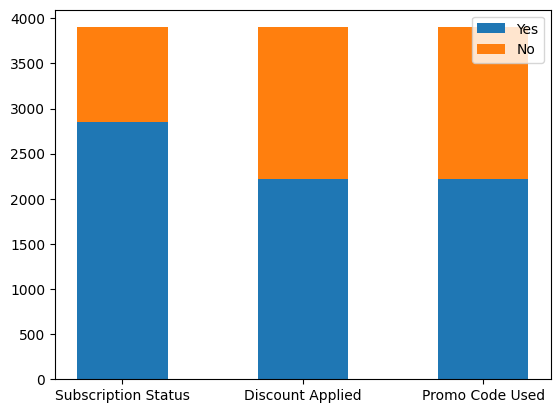

In [12]:
col =('Subscription Status','Discount Applied','Promo Code Used')
weight_counts = {
    
    "Yes": np.array([dic_bin['Subscription Status'][0][0], dic_bin['Discount Applied'][0][0], dic_bin['Promo Code Used'][0][0]]),
    "No": np.array([dic_bin['Subscription Status'][0][1], dic_bin['Discount Applied'][0][1], dic_bin['Promo Code Used'][0][1]]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    
    
    p = ax.bar(col, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count


ax.legend(loc="upper right")

plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"><p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: Amoung 3900 customer data,discount applied and promocode used are 1677. Customer those who subscribed are 1053 and those not are 2847.ie. 27% customers are subscribed and 43% customers discount applied.
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>

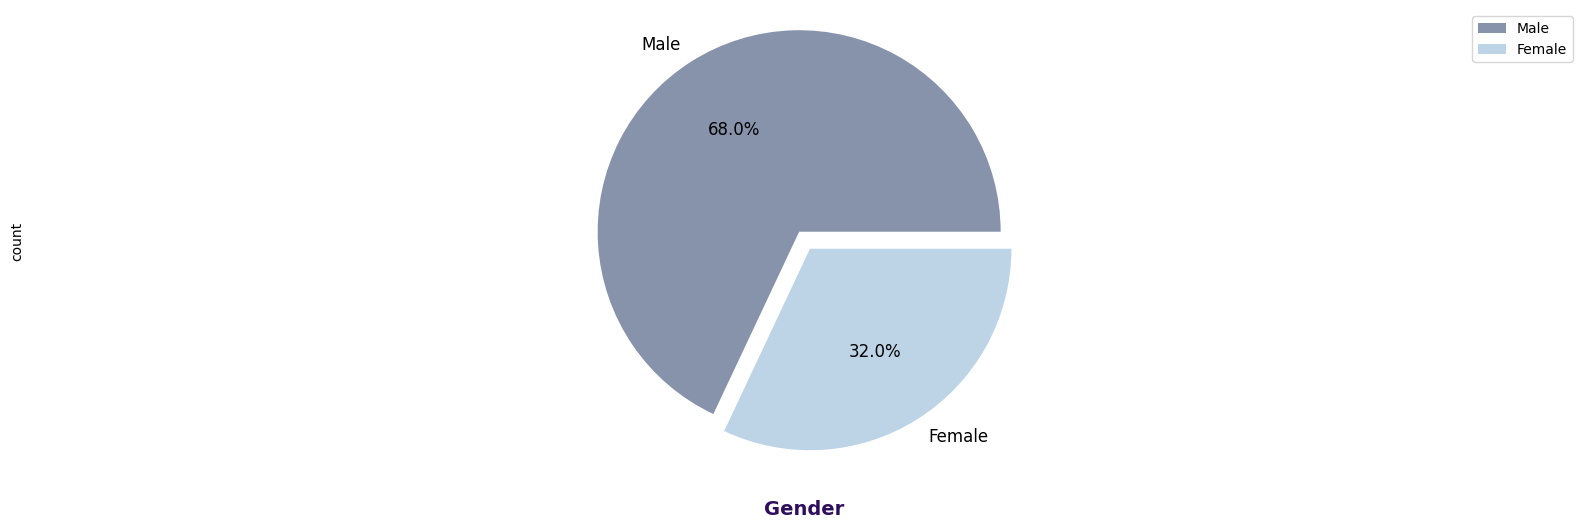

In [13]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%',colors=color)
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: Amoung 3900 customer data,68% customers are male and 32% are female.
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>

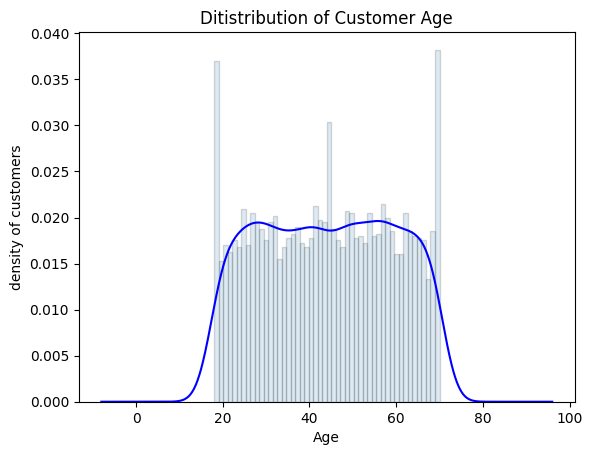

In [14]:
plt.hist(df['Age'], bins=50, edgecolor='k',density=True,alpha=.15)
df['Age'].plot(kind = 'kde', color = 'blue')
plt.plot()
plt.title("Ditistribution of Customer Age")
plt.ylabel("density of customers")
plt.xlabel('Age')
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: Amoung 3900 customer data,customers age distribution is between 18 to 70. They are slightly uniformly distributed.
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>

In [15]:
df['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

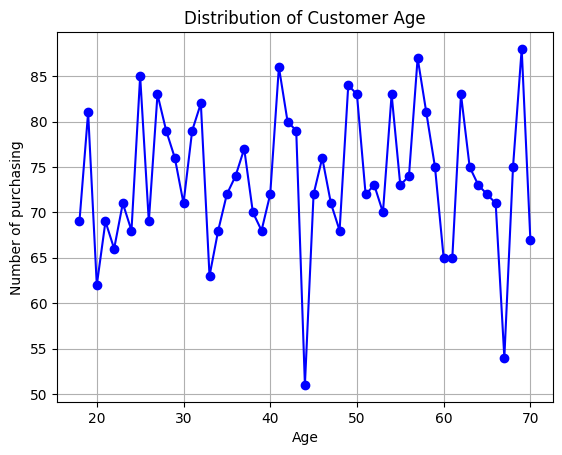

In [16]:
age_counts = df['Age'].value_counts().sort_index()

# Line plot
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-', color='blue')

plt.title("Distribution of Customer Age")
plt.ylabel("Number of purchasing")
plt.xlabel('Age')
plt.grid(True)
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS:"The number of purchases made by all customers varies between 50 and 100."
     <p style="font-weight: bold; color: white;"></i>                  </p>
</div>

<div style="padding-left:35%;
            color:#00000;
            margin:10px;
            font-size:150%;
            display:fill;
            font-family:newtimeroman;
            border-radius:35%;
            border-style: solid;
            border-color: grey;
            background-color:#969696;
            overflow:hidden;
            font-weight:bold"><b>Multivariate Analysis</b>
</div>

<div style="padding-left:35%;
            color:#00000;
            margin:10px;
            font-size:12px;  
            display:fill;
            font-family:newtimeroman;
            border-radius:35%;
            border-style: solid;
            border-color: grey;
            background-color:#969696;
            overflow:hidden;
            font-weight:bold;  
    <b>Multivariate Analysis</b>
</div>

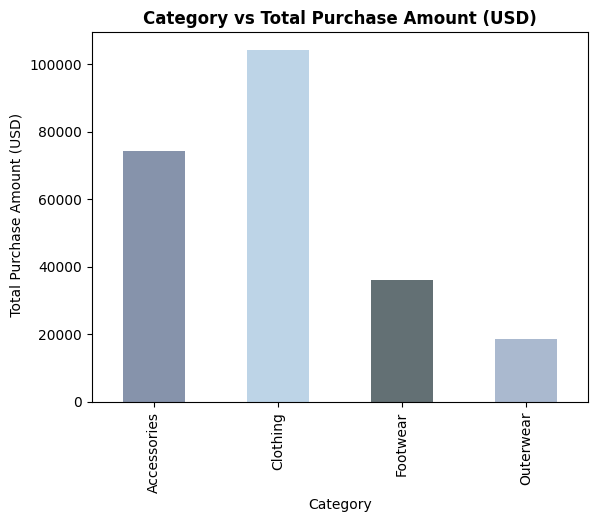

In [17]:
df_grouped = df.groupby('Category')['Purchase Amount (USD)'].sum()
df_grouped.plot.bar(color=color)
plt.ylabel(" Total Purchase Amount (USD)")
plt.xlabel("Category")
plt.title("Category vs Total Purchase Amount (USD)",fontsize=12, weight='bold')
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: "
customers spend more money on clothing and then accessories."
     <p style="font-weight: bold; color: white;"></i>                  </p>
</div>

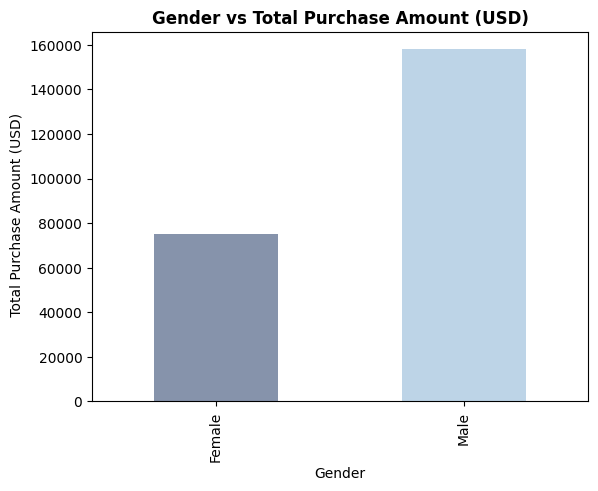

In [18]:
df_grouped = df.groupby('Gender')['Purchase Amount (USD)'].sum()
df_grouped.plot.bar(color=color)
plt.ylabel(" Total Purchase Amount (USD)")
plt.xlabel("Gender")
plt.title("Gender vs Total Purchase Amount (USD)",fontsize=12, weight='bold')
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: 
"Male customers tend to spend more than their female counterparts."
     <p style="font-weight: bold; color: white;"></i>                  </p>
</div>

In [19]:
df=df.replace({'Gender':{'Male':0,'Female':1}})
for col,itm in dic_bin.items():
    if col!='Gender':
        df=df.replace({col :{'Yes':1,'No': 0}})

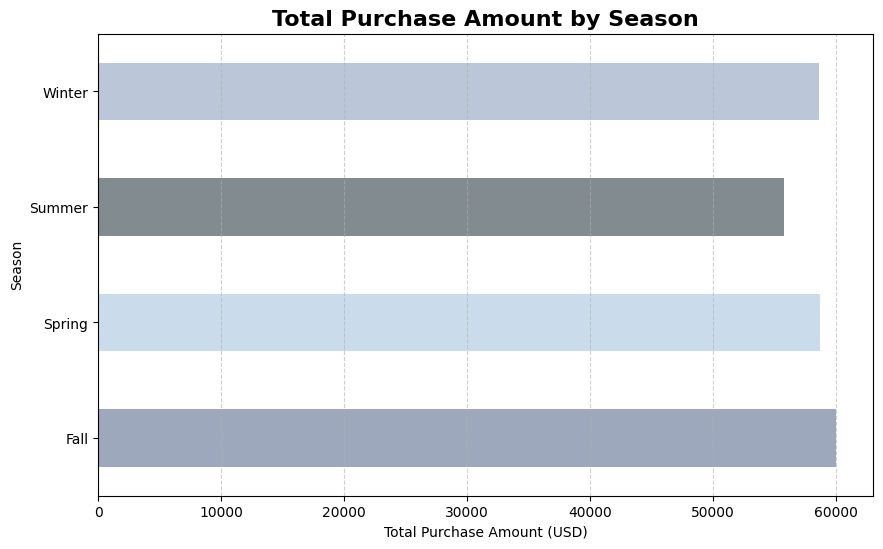

In [20]:
df_grouped = df.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
ax = df_grouped.plot.barh(color=color,alpha=.8)
ax.set_xlabel("Total Purchase Amount (USD)")
ax.set_ylabel("Season")
ax.set_title("Total Purchase Amount by Season",fontsize=16, weight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: "For all seasons, customers spend nearly the same amount of money on shopping."
     <p style="font-weight: bold; color: white;"></i>                  </p>
</div>

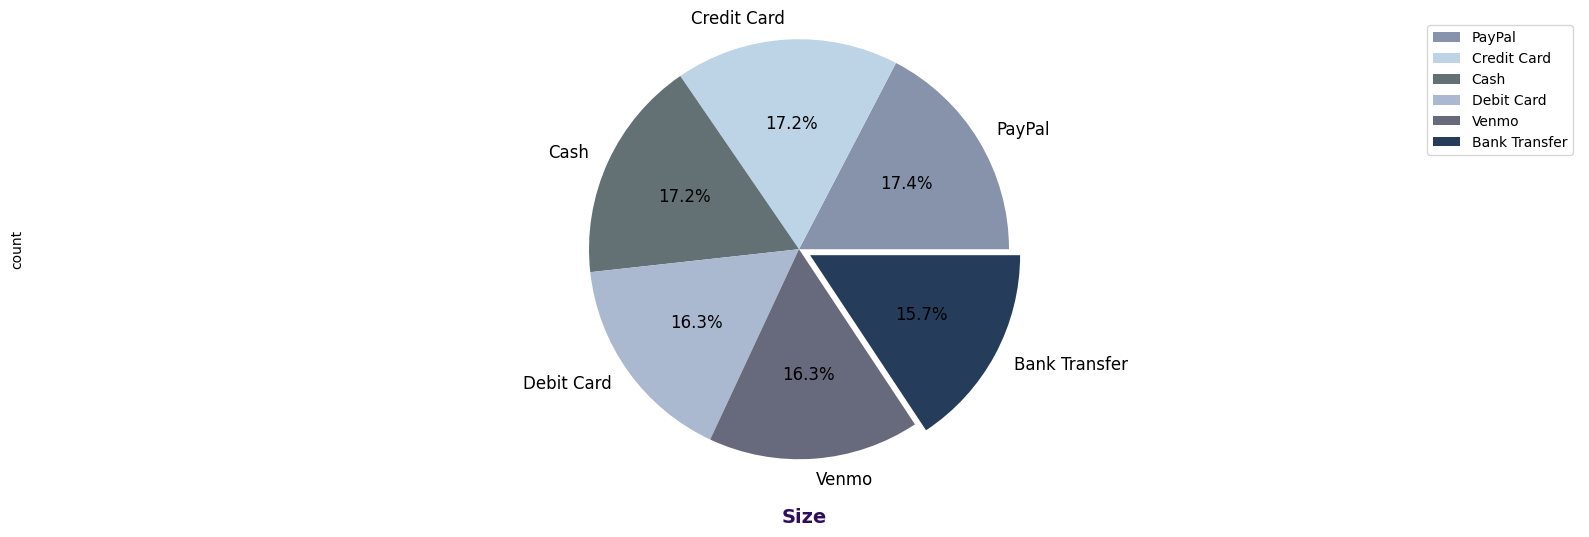

In [21]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = color, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()


<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"><p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: "Customers tend to show the same level of interest in all payment methods."
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>



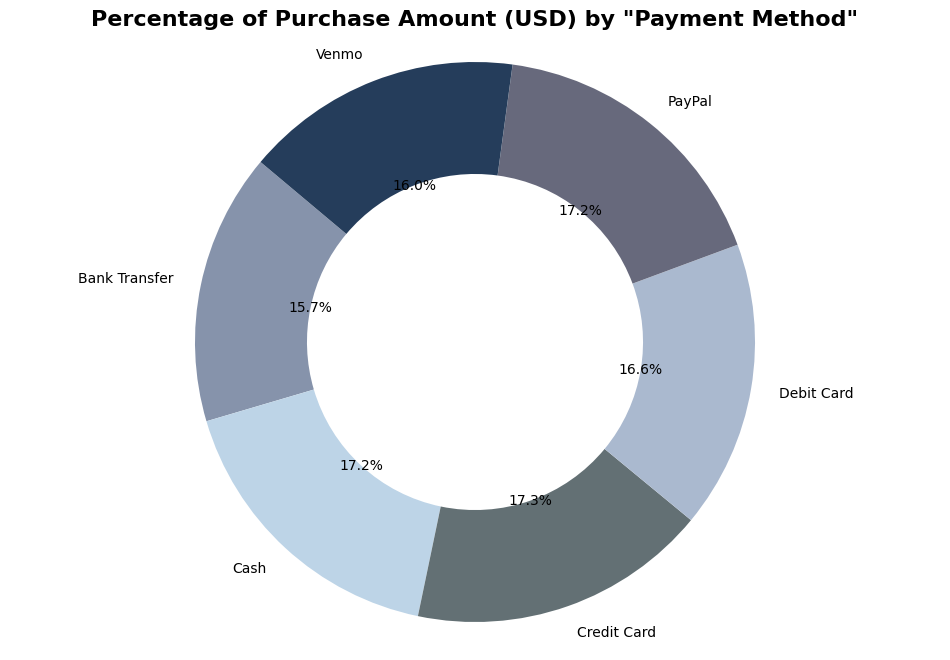

In [22]:
pay_counts = df["Payment Method"].value_counts()
total_amount = df['Purchase Amount (USD)'].sum()

# Calculate the percentage of the amount for each category
payment_percentages = (df.groupby("Payment Method")['Purchase Amount (USD)'].sum() / total_amount) * 100

# Plotting the pie chart
plt.figure(figsize=(12, 8))

explode = [0.0002] * len(pay_counts)  # Explode the slices for emphasis

plt.pie(payment_percentages, labels=payment_percentages.index, autopct='%1.1f%%', startangle=140,
        colors=color, explode=explode, wedgeprops=dict(width=0.4))

plt.title('Percentage of Purchase Amount (USD) by "Payment Method"', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: 
"The amount of transactions conducted in all payment methods is nearly the same."
     <p style="font-weight: bold; color: white;"></i>                  </p>
</div>

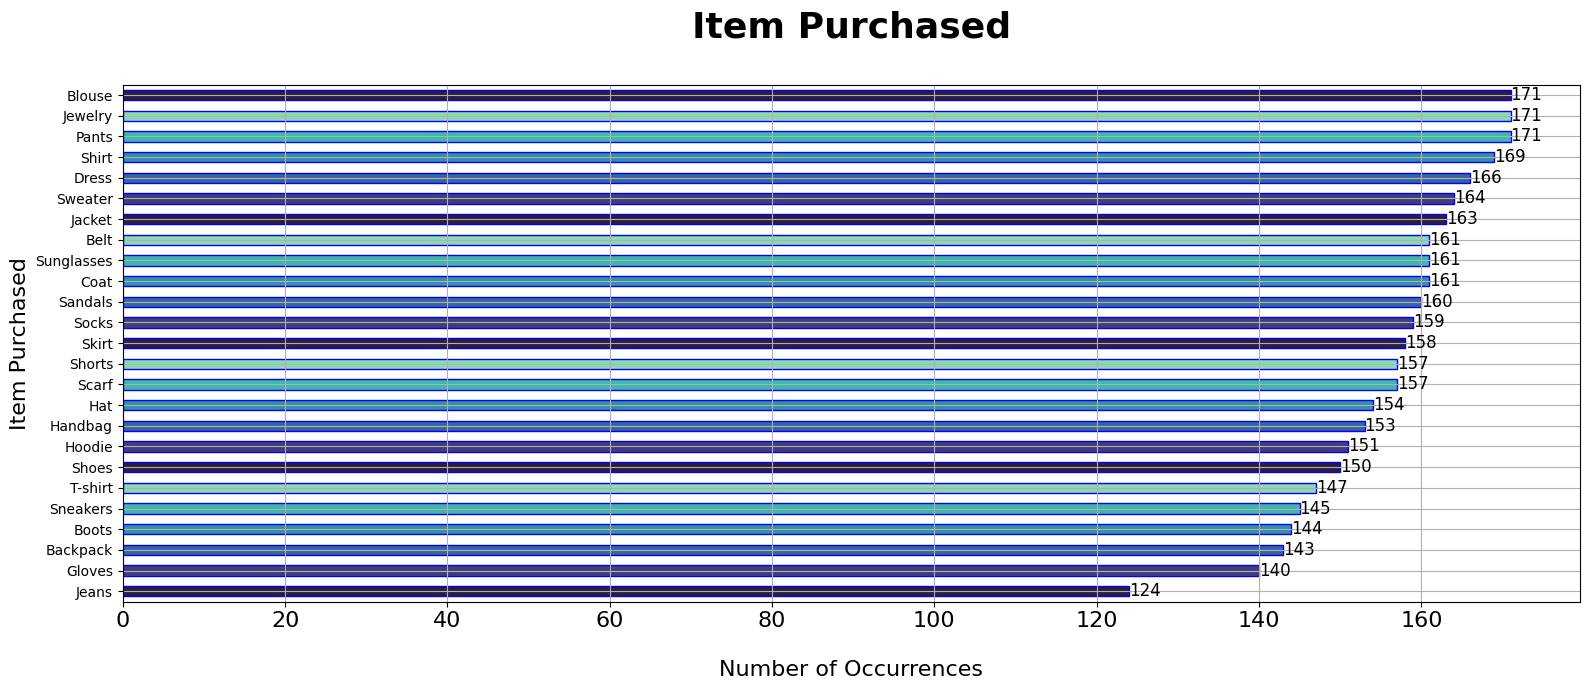

In [23]:
plt.figure(figsize=(16, 7))

# Plotting the horizontal bar chart
count=df["Item Purchased"].value_counts().sort_values(ascending=True).plot(
    kind='barh', color=sns.color_palette("mako"), edgecolor='blue'
)

# Adding labels and title
plt.ylabel('Item Purchased', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Item Purchased\n', fontsize=26,weight='bold')

# Setting x-axis ticks and rotating them for better readability
plt.xticks(rotation=0, ha='center', fontsize=16)

# Adding grid
plt.grid(True)
for index, value in enumerate(df["Item Purchased"].value_counts().sort_values(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=12)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: 
""Customers show more interest in buying blouses, jewelry, and pants compared to others, with clothing items dominating among the top 10 positions."The amount of transactions conducted in all payment methods is nearly the same."
     <p style="font-weight: bold; color: white;"></i>                </p>
</div>

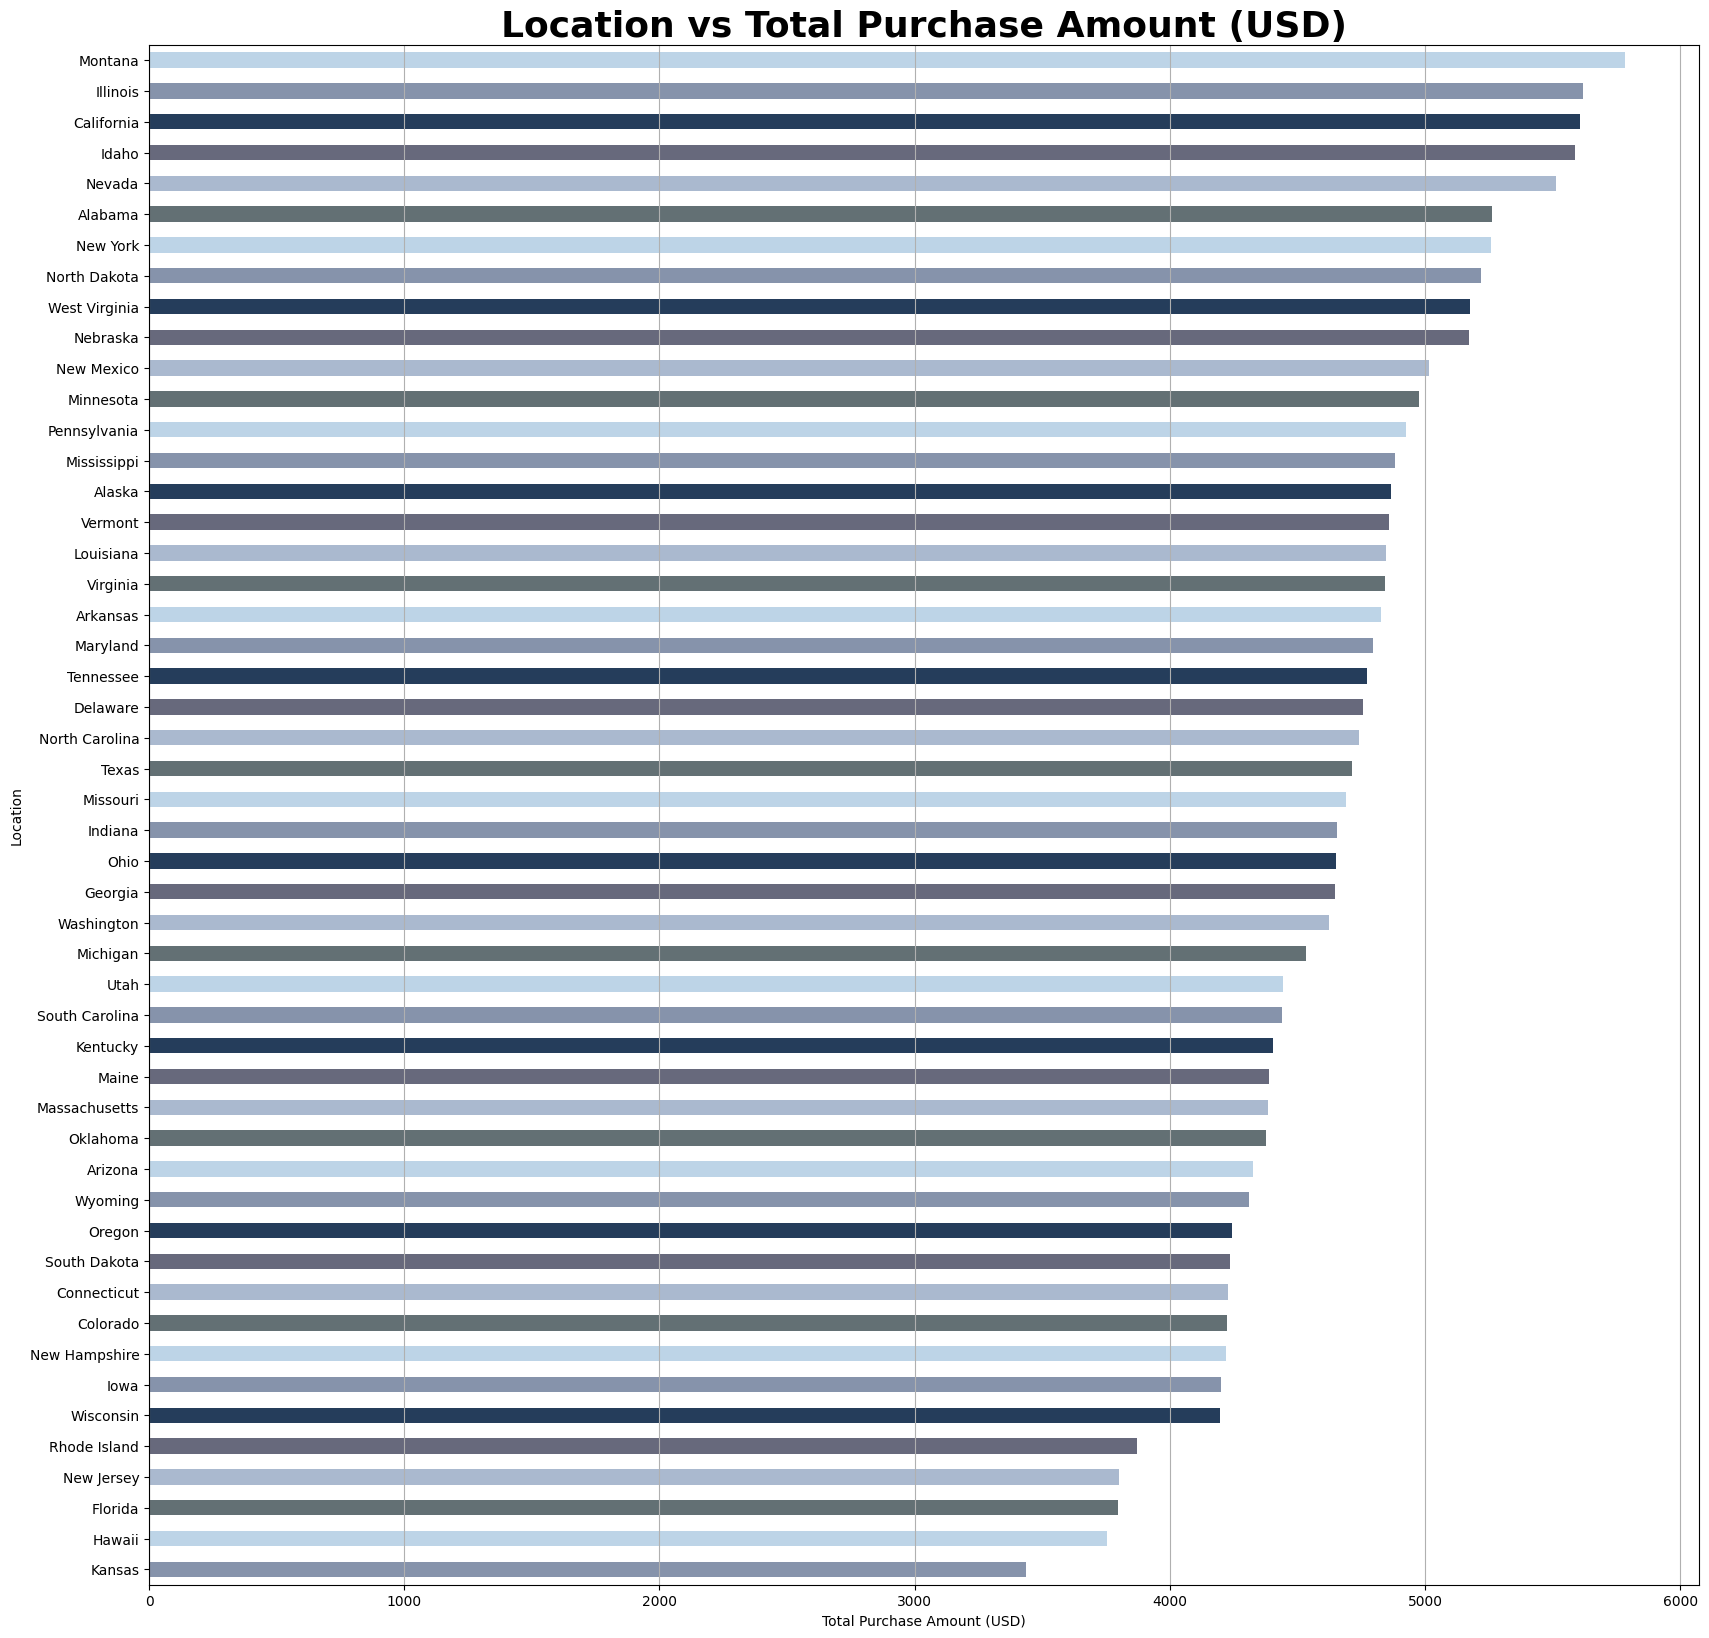

In [24]:
df_grouped = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=True)

# Set the figure size
plt.figure(figsize=(20, 20))

# Plotting the bar chart
df_grouped.plot.barh(color=color)

# Adding labels and title
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Location")
plt.title("Location vs Total Purchase Amount (USD)", fontsize=26, weight='bold')
plt.grid(True,axis='x')
# Display the plot
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: "The people from Montana, Illinois, California, Idaho, and Nevada tend to show more interest in shopping than others."
     <p style="font-weight: bold; color: white;"></i>                  </p>
</div>

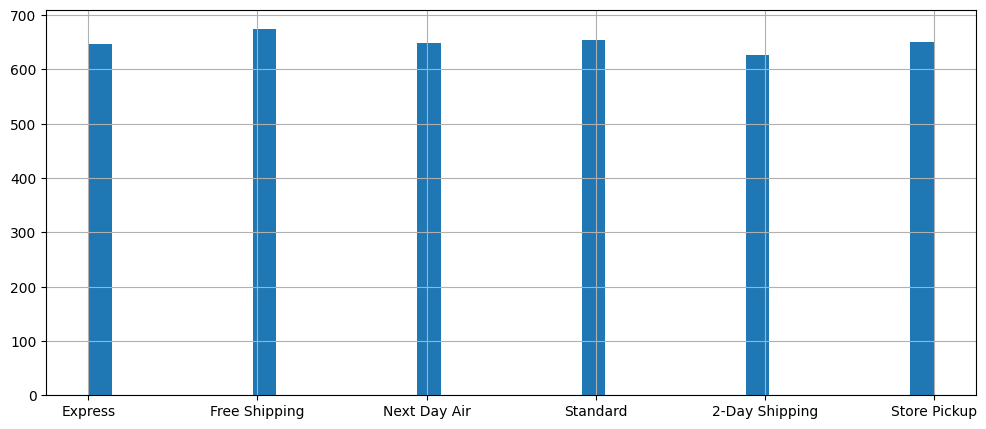

In [25]:
plt.figure(figsize=(12,5))
plt.hist(df['Shipping Type'],bins=36)
plt.grid()
plt.show()



<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: 
"Customers tend to show almost the same level of interest in all shipping types."
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>

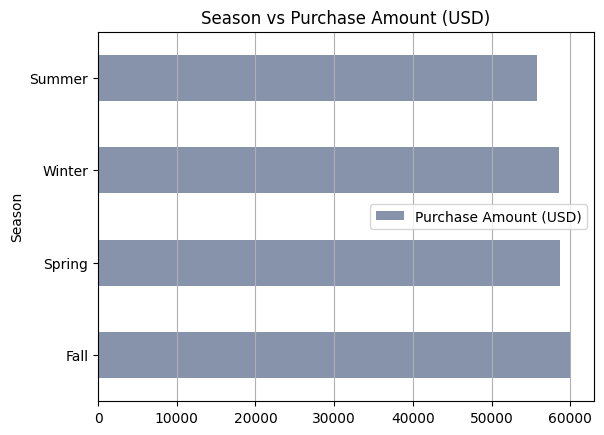

In [26]:

df_loc=pd.DataFrame(df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head())

df_loc.plot(kind='barh',color=color)
plt.title("Season vs Purchase Amount (USD)")
plt.grid(True,axis='x')
plt.show()

<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: 
"In the fall season, there tends to be a slight increase in the total amount of purchases."
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>

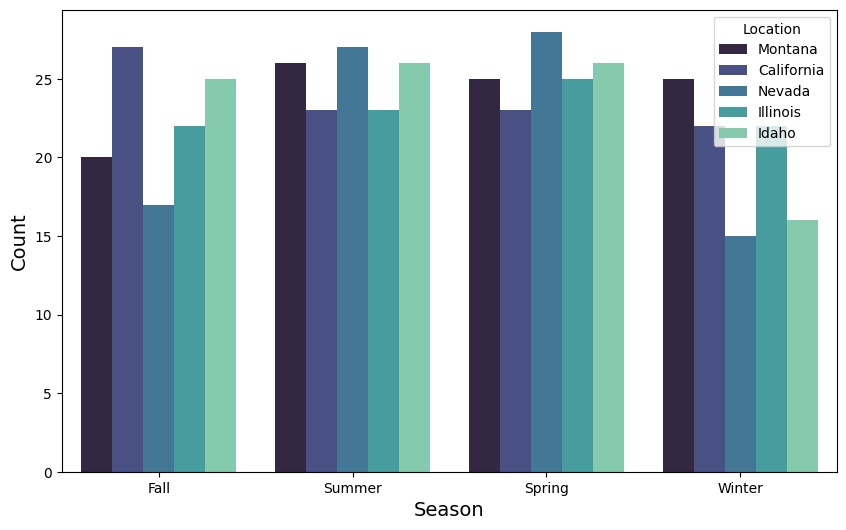

In [27]:
df_loc10=pd.DataFrame(df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head())
lis=df_loc10.index.tolist()
df_loc10=df.loc[df['Location'].isin( lis)]

# Create a count plot for two categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Location', data=df_loc10,palette='mako')

# Adding labels and title
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('', fontsize=16, weight='bold')

# Display the plot
plt.show()




<div style="background-color:#253D5B; padding:10px; border-radius: 10px; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
    <p style="font-weight: bold; color: white;"></p>
    <p style="font-weight: bold; color: white;">     
 <i>                     INSIGHTS: 
"Among the states with high purchasing rates, it tends to show a preference for the spring season, leading to higher average spending."
     <p style="font-weight: bold; color: white;"></i>                   </p>
</div>

 
 # <p style="background-color:#253D5B; font-family:newtimeroman;color:#FFF9ED;font-size:100%; text-align:center; border-radius: 20px 60px;">🛍️ Descriptive Statistics : 🛒</p>
 
> <b> <i>
Descriptive statistics are used to summarize and describe the main features of a dataset. They provide a concise summary of the main aspects of the data, such as central tendency, variability, and distribution. </i></b>


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #416490;
            background-color:#656F7C;
            overflow:hidden;
            font-weight:400"><b>What is the most common payment method used by customers ?</b>
</div>

In [28]:
print("Most common payment method used by customers : ",df['Payment Method'].mode()[0])

Most common payment method used by customers :  PayPal


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #416490;
            background-color:#656F7C;
            overflow:hidden;
            font-weight:400"><b>At which location was the greatest total purchase amount recorded?</b>
</div>

In [29]:
loc_amount=df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
print("The location where the total purchase amount  highest is : ",loc_amount.idxmax())



The location where the total purchase amount  highest is :  Montana


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #416490;
            background-color:#656F7C;
            overflow:hidden;
            font-weight:400"><b>What is the avarage age of customers ?</b>
</div>

In [30]:
print("The location where the total purchase amount  highest is : ",round(df['Age'].mean(),2))

The location where the total purchase amount  highest is :  44.07


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #416490;
            background-color:#656F7C;
            overflow:hidden;
            font-weight:400"><b>What is the most frequently purchased 3 item?</b>
</div>

In [31]:
lis_itm=list(df['Item Purchased'].value_counts().nlargest(3).index)
print("Most frequently purchased item is : ",lis_itm)

Most frequently purchased item is :  ['Blouse', 'Jewelry', 'Pants']
